# Sports articles for objectivity analysis

# Project Description
The objective of this project is to apply machine learning models and algorithms
related to supervised learning, in our caso in relation to Sports articles for objectivity analysis.

In [164]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt


# Data pre-processing
### Checking the data
Before we start to use the dataset, we need to check if its in a proper shape, if it does not have many missing values, etc.

In [165]:
import os
#data_set = pd.read_excel(os.getcwd() + "../SportsArticles/features.xls")
data_set = pd.read_csv('../SportsArticles/features.csv')
data_set.head()

,TextID,URL,Label,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
0,Text0001,http://msn.foxsports.com/foxsoccer/mexico/stor...,objective,109,0,1,7,9,0,5,...,0,3,0,11,0,0,0,0,1,18
1,Text0002,http://msn.foxsports.com/foxsoccer/premierleag...,objective,309,21,4,1,19,1,4,...,0,10,0,13,0,14,9,1,1,14
2,Text0003,http://uk.eurosport.yahoo.com/04022011/58/fed-...,objective,149,6,1,8,14,0,5,...,0,2,0,8,0,3,2,1,1,18
3,Text0004,http://uk.eurosport.yahoo.com/07022011/58/bund...,objective,305,18,5,7,26,0,10,...,0,8,3,13,1,7,1,1,1,20
4,Text0005,http://uk.eurosport.yahoo.com/05022011/58/fed-...,objective,491,23,8,33,47,0,12,...,0,16,2,34,1,5,6,1,1,24


In [166]:
data_set.describe()

,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,FW,INs,JJ,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,697.120000,39.005000,13.934000,20.626000,66.452000,1.054000,11.477000,75.151000,47.432000,2.152000,...,2.70100,19.187000,5.419000,29.942000,4.389000,17.124000,11.899000,0.927000,0.995000,19.142000
std,523.340997,32.134835,13.617528,22.765773,52.045407,1.663084,12.690174,55.927293,38.373218,2.858158,...,4.81069,16.756754,5.811989,25.226752,5.126008,17.811285,12.356354,0.260267,0.070569,6.632483
min,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,272.000000,13.000000,4.000000,7.000000,24.750000,0.000000,3.000000,31.750000,19.000000,0.000000,...,0.00000,6.000000,1.000000,11.000000,1.000000,4.000000,3.000000,1.000000,1.000000,15.000000
50%,626.000000,33.000000,10.000000,14.000000,58.000000,0.000000,8.000000,67.000000,40.000000,1.000000,...,1.00000,14.000000,4.000000,24.000000,3.000000,11.000000,8.000000,1.000000,1.000000,18.000000
75%,953.250000,56.000000,20.250000,26.250000,93.000000,1.000000,15.000000,103.000000,65.000000,3.000000,...,3.00000,29.000000,8.000000,44.000000,7.000000,25.000000,18.000000,1.000000,1.000000,22.000000
max,4283.000000,237.000000,97.000000,225.000000,471.000000,12.000000,96.000000,473.000000,354.000000,26.000000,...,44.00000,127.000000,39.000000,220.000000,31.000000,142.000000,97.000000,1.000000,1.000000,73.000000


### Checking for missing values
One of the problems that can ocurr often is empty values in the data set. So we are going to verify is there are any empty values.


In [167]:
data_set.isna().sum()

TextID              0
URL                 0
Label               0
totalWordsCount     0
semanticobjscore    0
                   ..
present3rd          0
present1st2nd       0
sentence1st         0
sentencelast        0
txtcomplexity       0
Length: 62, dtype: int64

The data set is complete

### Analysing the data


Text(0, 0.5, 'Frequency')

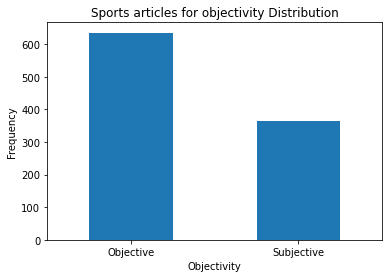

In [168]:
count_objective = pd.value_counts(data_set['Label']=="objective", sort=True)
count_objective.plot(kind='bar', rot=0)
plt.title("Sports articles for objectivity Distribution")
LABELS = ["Objective", "Subjective"]
plt.xticks(range(2), LABELS)
plt.xlabel("Objectivity")
plt.ylabel("Frequency")

dataset e unbalenced 
fazer undersample para os objective

In [169]:
objective = data_set[data_set["Label"]=="objective"]
objective = objective.sample(n= len(subjective), random_state=101)

subjective = data_set[data_set["Label"]=="subjective"]

data_set = pd.concat([objective,subjective],axis=0)


print(objective.shape, subjective.shape)

(365, 62) (365, 62)


Text(0, 0.5, 'Frequency')

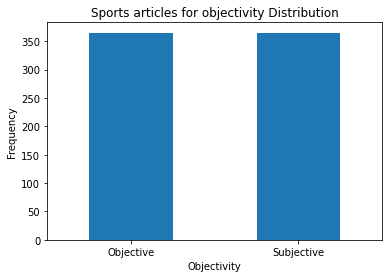

In [170]:
count_objective = pd.value_counts(data_set['Label']=="objective", sort=True)
count_objective.plot(kind='bar', rot=0)
plt.title("Sports articles for objectivity Distribution")
LABELS = ["Objective", "Subjective"]
plt.xticks(range(2), LABELS)
plt.xlabel("Objectivity")
plt.ylabel("Frequency")

In [171]:
objective.describe()

,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,FW,INs,JJ,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,518.010959,28.178082,8.956164,19.027397,48.632877,0.556164,8.205479,56.668493,35.126027,1.284932,...,1.402740,12.983562,3.334247,26.830137,2.498630,9.991781,7.432877,0.934247,0.991781,18.602740
std,404.494753,25.431087,9.782146,20.989776,40.764898,1.107044,9.827578,43.525062,29.266312,1.822002,...,3.541666,12.171835,3.884041,24.398448,3.266231,11.778050,8.678888,0.248191,0.090410,6.603653
min,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,207.000000,9.000000,2.000000,6.000000,17.000000,0.000000,2.000000,23.000000,13.000000,0.000000,...,0.000000,4.000000,1.000000,8.000000,0.000000,3.000000,2.000000,1.000000,1.000000,14.000000
50%,392.000000,19.000000,6.000000,13.000000,35.000000,0.000000,5.000000,45.000000,27.000000,1.000000,...,0.000000,10.000000,2.000000,19.000000,1.000000,7.000000,4.000000,1.000000,1.000000,17.000000
75%,735.000000,41.000000,12.000000,28.000000,68.000000,1.000000,11.000000,80.000000,49.000000,2.000000,...,1.000000,19.000000,5.000000,42.000000,3.000000,13.000000,10.000000,1.000000,1.000000,21.000000
max,2182.000000,152.000000,62.000000,181.000000,241.000000,8.000000,72.000000,250.000000,171.000000,12.000000,...,37.000000,99.000000,27.000000,151.000000,18.000000,132.000000,64.000000,1.000000,1.000000,52.000000


In [172]:
subjective.describe()

,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,FW,INs,JJ,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,1006.624658,57.958904,22.676712,22.898630,98.109589,1.956164,17.183562,107.367123,68.704110,3.578082,...,5.191781,28.969863,8.989041,35.495890,7.693151,29.326027,20.000000,0.915068,0.997260,19.931507
std,544.518357,33.572718,15.014997,23.767258,54.899499,2.034928,14.656760,58.179497,42.786142,3.417402,...,6.069781,16.670586,6.557848,24.547848,5.870777,19.303262,13.891653,0.279162,0.052342,6.637243
min,76.000000,2.000000,0.000000,0.000000,4.000000,0.000000,0.000000,9.000000,4.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
25%,704.000000,37.000000,13.000000,10.000000,67.000000,0.000000,7.000000,76.000000,45.000000,1.000000,...,1.000000,16.000000,5.000000,19.000000,3.000000,16.000000,10.000000,1.000000,1.000000,16.000000
50%,930.000000,55.000000,20.000000,16.000000,91.000000,1.000000,13.000000,98.000000,61.000000,3.000000,...,3.000000,28.000000,8.000000,31.000000,7.000000,26.000000,18.000000,1.000000,1.000000,19.000000
75%,1153.000000,70.000000,29.000000,27.000000,117.000000,3.000000,23.000000,129.000000,81.000000,5.000000,...,8.000000,41.000000,12.000000,48.000000,11.000000,39.000000,28.000000,1.000000,1.000000,22.000000
max,4283.000000,237.000000,97.000000,199.000000,471.000000,12.000000,96.000000,473.000000,354.000000,26.000000,...,44.000000,102.000000,39.000000,220.000000,31.000000,142.000000,97.000000,1.000000,1.000000,73.000000


### Feature Selection
The next step is to generate a correlation matrix that assesses the correlation between each feature.

### Removing features

NNP and WRB tem todos os valores igual a 0 -> podemos remover-los?

In [173]:
data_set=data_set.drop(['NNP', 'WRB'], axis=1)

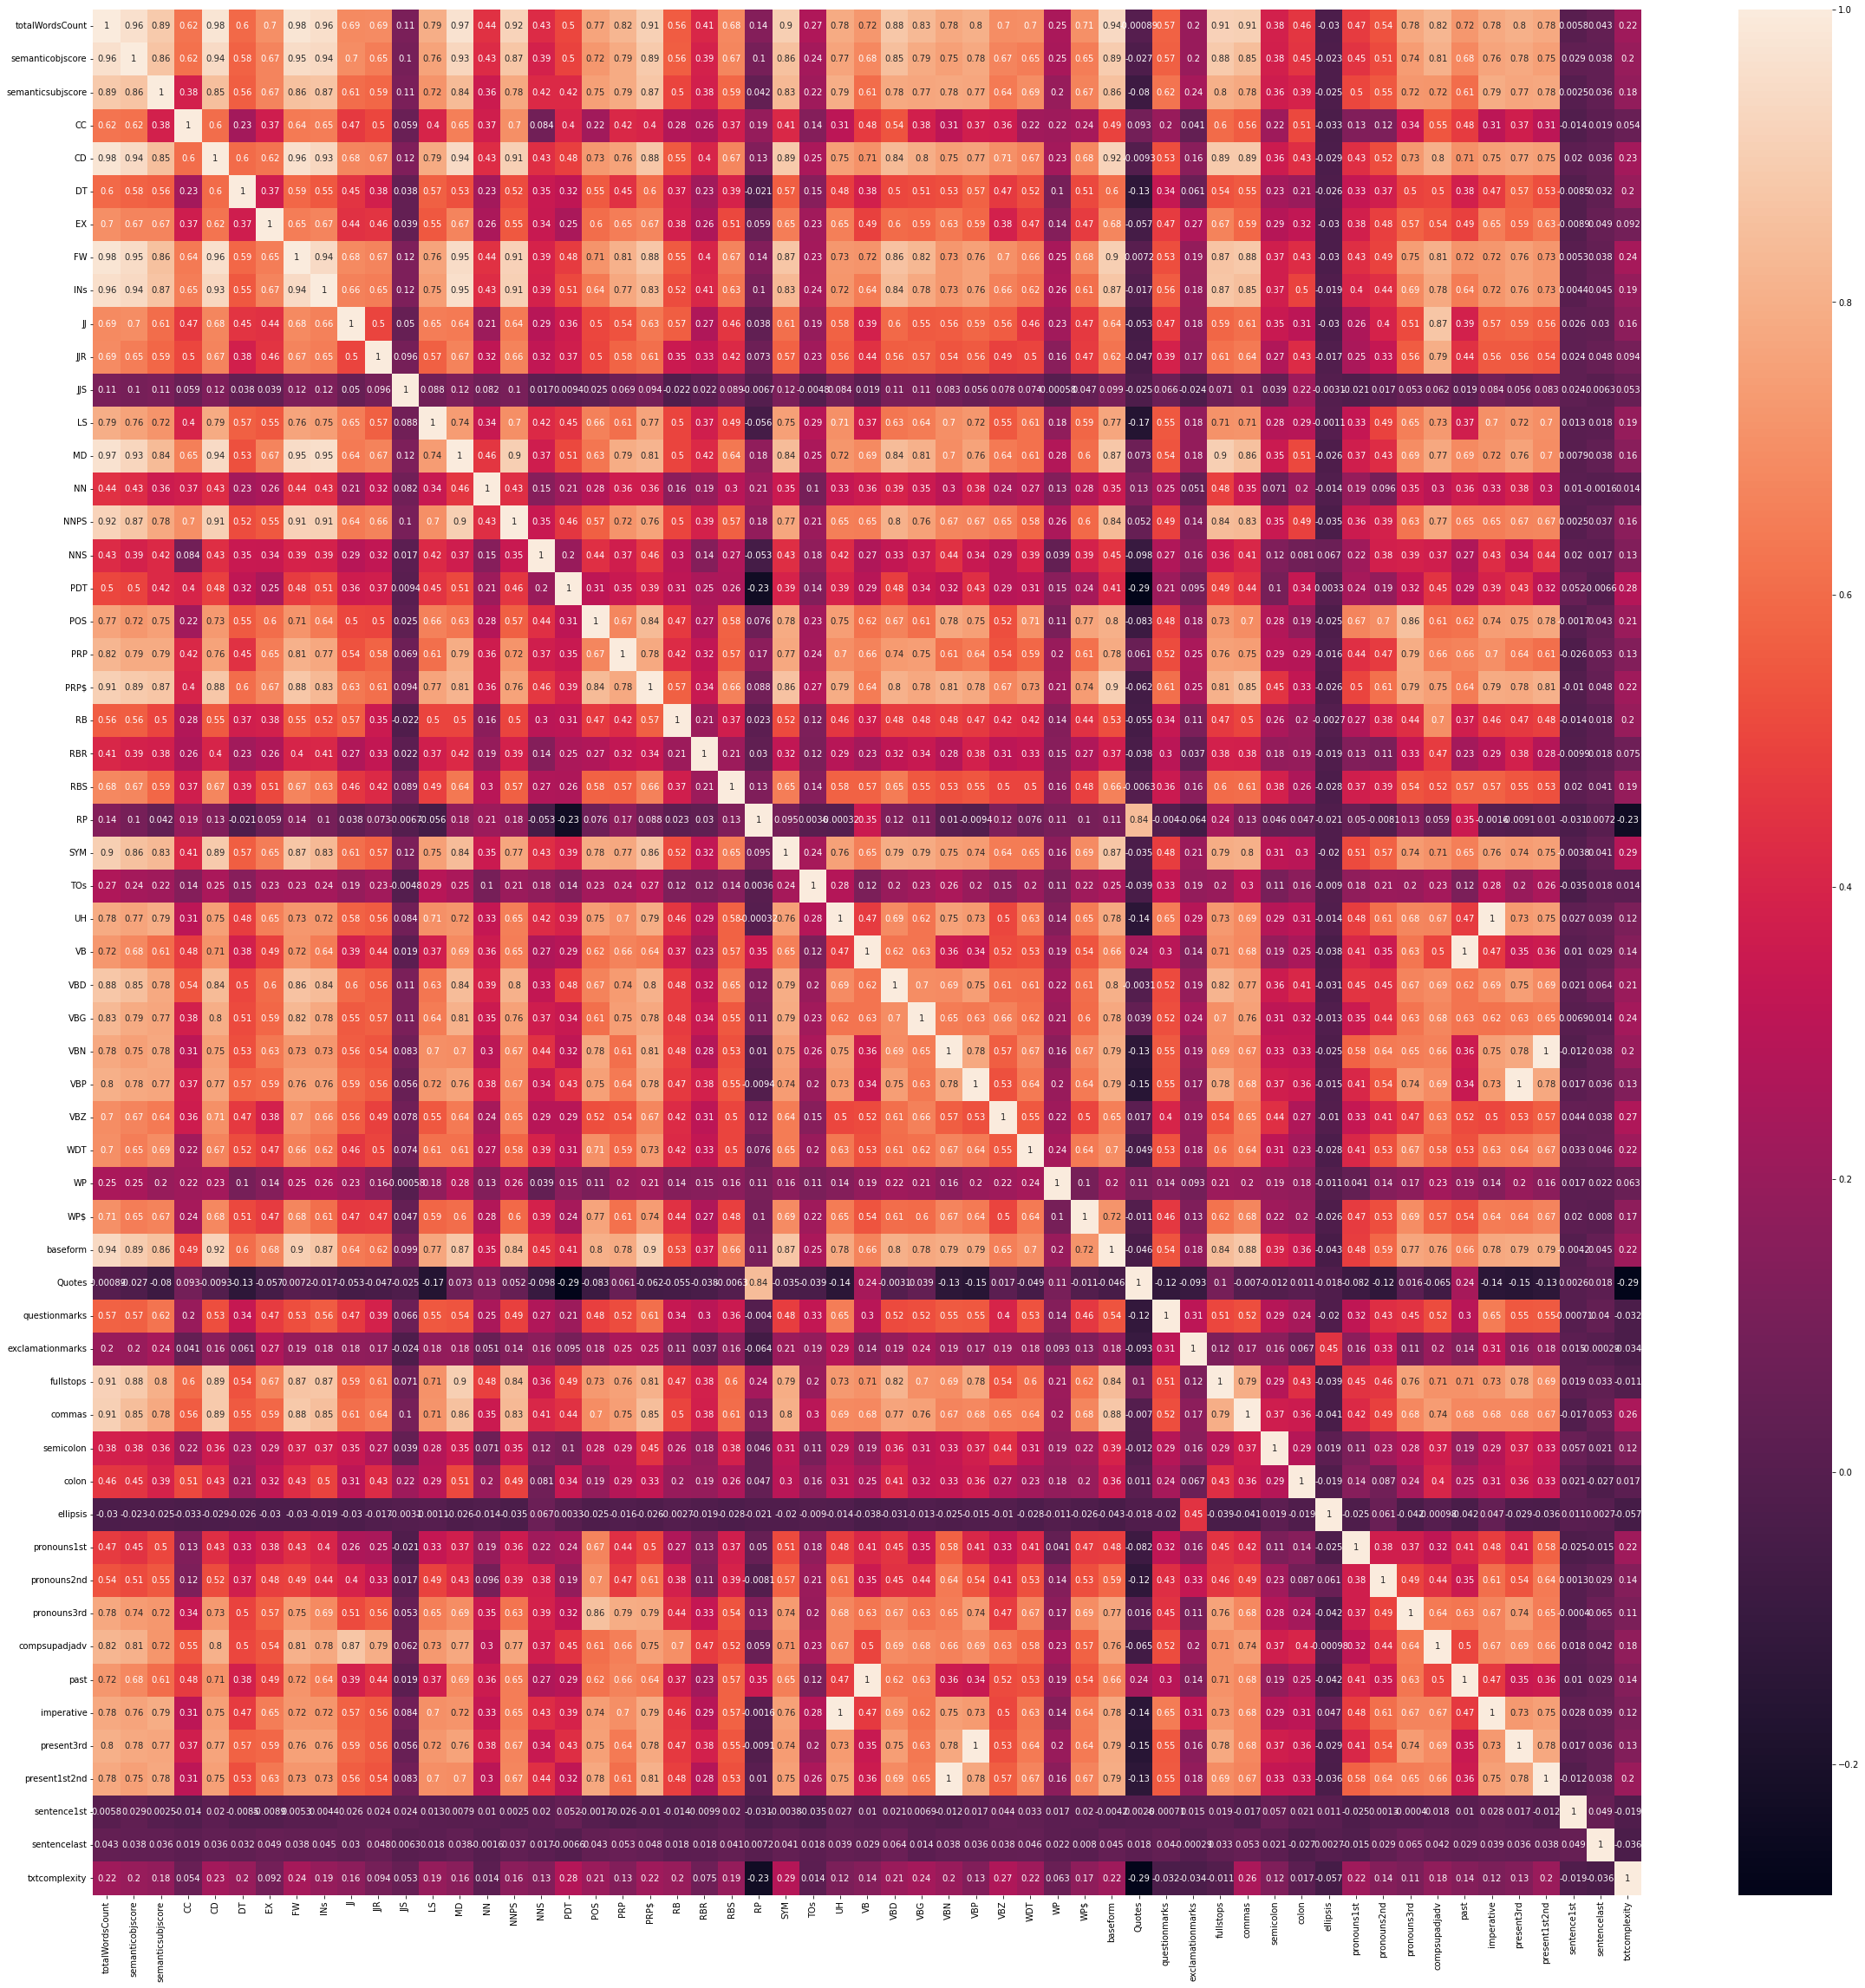

In [174]:
correlation_matrix = data_set.corr()
coor_features = correlation_matrix.index

plt.figure(figsize=(40,40))

heat_map= sb.heatmap(data_set[coor_features].corr(),annot=True)


dropping features with high correlation

In [175]:
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool)) 


/tmp/ipykernel_7344/303308982.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))


#### Select features to drop
NOTA:alterar o valor de correlaçao e dps comparar os resultados(0.7, 0.8, 0.95)

In [176]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print(to_drop)

['semanticobjscore', 'CD', 'FW', 'INs', 'MD', 'NNPS', 'PRP$', 'SYM', 'baseform', 'fullstops', 'commas', 'past', 'imperative', 'present3rd', 'present1st2nd']


#### Removing features from data set

In [177]:
data_set=data_set.drop(to_drop, axis=1)

In [178]:
data_set.head()

,TextID,URL,Label,totalWordsCount,semanticsubjscore,CC,DT,EX,JJ,JJR,...,semicolon,colon,ellipsis,pronouns1st,pronouns2nd,pronouns3rd,compsupadjadv,sentence1st,sentencelast,txtcomplexity
202,Text0212,http://msn.foxsports.com/nfl/story/nfc-afc-cha...,objective,1360,23,65,0,6,5,0,...,1,10,0,0,0,24,11,1,1,21
74,Text0078,http://msn.foxsports.com/nfl/story/jovan-belch...,objective,1197,22,12,0,8,1,2,...,0,1,0,6,1,36,4,1,1,15
618,Text0649,http://uk.eurosport.yahoo.com/news/formula-1-m...,objective,114,0,7,0,3,1,0,...,0,0,0,0,0,1,1,1,1,8
323,Text0337,http://msn.foxsports.com/wnba/story/WNBA-draft...,objective,148,0,8,0,8,0,0,...,0,2,0,0,0,0,0,1,1,18
128,Text0136,http://msn.foxsports.com/foxsoccer/world/story...,objective,1320,32,32,1,7,2,5,...,0,0,0,0,0,23,8,1,1,20


### Preparing the data